<a href="https://colab.research.google.com/github/HyeongseokKim/My_codes/blob/main/Linear_Regression%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression

### 가상의 데이터로 예측하기

In [1]:
from sklearn.datasets import make_regression

-  Scikit-Learn의 datasets 서브패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()을 제공한다. make_regression()으로 만들어진 데이터는 종속 변수 y의 값이 독립변수 x 벡터의 선형 조합인 선형관계를 가진다.

In [58]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 10)
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [3]:
print('input data :\n{}, \n\n output data :\n{}'.format(data[0][-10:], data[1][-10:]))

input data :
[[-0.25323167]
 [ 1.15587281]
 [ 1.47492592]
 [ 0.28234065]
 [ 0.04364515]
 [ 0.13644717]
 [ 0.27060878]
 [ 1.14263601]
 [ 0.44046383]
 [-1.86942687]], 

 output data :
[ 936.14253323 1105.50970784 1224.06049914 1011.32740355 1031.39327301
  940.01798899  999.75801937 1042.65993258 1056.55301266  732.54228126]


- n_samples : 기본값은 100, 표본 데이터의 갯수, 정수
- n_features : 기본값은 100, 독립변수의 수(차원), 정수
- n_target : 기본값은 1, 종속변수의 수, 정수
- bias = 기본값은 0.0, y절편, 실수
- nosie = 기본값은 0.0, 분포

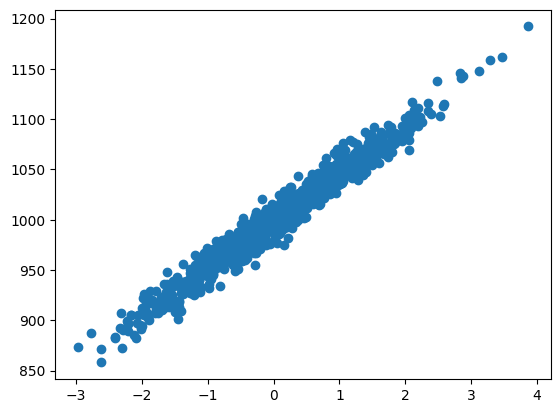

In [59]:
# 위에서 생성한 가상 데이터 셋을 그래프위에 그려 보았습니다.
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data[0], data[1])
plt.show()

#### 선형 모델을 만들어 보자.

In [60]:
from sklearn.model_selection import train_test_split
# train_test_split은 데이터를 학습용 데이터와 검증용 데이터로 분리시켜줍니다.

X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size = 0.2, shuffle = True)

# 생성한 가상의 데이터를 훈련용 데이터와 검증 데이터로 나눠주는 과정입니다.

- train_test_split(data, data2, test_size, train_size, shuffle, random_state)  
  data: 독립변수 데이터  
  data2: 종속변수 데이터 (data 인수에 종속변수가 포함되어 있다면 생략해도 된다.)  
  test_size: 검증용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다. (기본값은 0.25)  
  train_size : 학습용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다.(test_size와 train_size 중 하나만 사용해도 된다.)  
  shuffle: 데이터를 섞어준다. (기본값은 True)  
  random_state: 난수를 생성해준다.

In [61]:
# 선형회귀(Linear Regression)

from sklearn.linear_model import LinearRegression
# LinearRegression을 import 합니다.

hypothesis = LinearRegression()
# import한 LinearRegression을 model이라는 변수에 대입한다.
# 굳이 별도의 변수에 넣어주지 않고 LinearRegression() 으로 사용해도 무방합니다. 여기서는 설명을 위해 변수에 대입하였습니다.

# 단일피쳐 선형회귀 모델의 가설함수는?


#### 생성한 모델을 학습시켜보자.

In [62]:
model_linear = hypothesis.fit(X_train, y_train)
# fit()은 모델을 학습시키는 명령입니다.

# fit 에서 일어나는 일에는 어떤 것들이 있을까?

모델이 학습할 때 일어나는 일들
1. 코스트 계산  
cost=sum((y_pred - y_real) ** 2)->SSE  
cost=sum((y_pred - y_real) ** 2)/N->MSE  
2. 가중치를 업데이트 해준다.(10000)  
for i in range(10000):  
&nbsp; &nbsp;  gradientDecsect(cost) -> 구한 코스트를 통해 기울기를 계산하고, weight를 기울기 반대방향으로 업데이트

#### 생성한 모델의 weight(가중치, 계수)와 bias를 출력해보자.

In [63]:
model_linear.coef_
# coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열입니다.
# 우리가 생성한 데이터에는 입력 특성이 하나이므로 하나만 출력됩니다.
# coef_ 는 weight값을 보여줍니다.

array([46.83825207])

In [64]:
model_linear.intercept_
# intercept_ 속성은 항상 실수 값 하나입니다.
# intercept_ 는 bias(y 절편)값을 보여줍니다.

999.316475506433

#### 우리가 생성한 모델을 검증 해보자.

- score()로 모델을 검증할 수 있다.

In [65]:
print("train data score : {:.2f}".format(model_linear.score(X_train, y_train)))
print("test data score : {:.4f}".format(model_linear.score(X_test, y_test)))

train data score : 0.96
test data score : 0.9598


In [ ]:
# Trainset data 와 함께, Hypothesis (직선) 시각화해보기
# Testset data 와 함께, Hypothesis (직선) 시각화해보기

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
# 회귀 평가 지표인 mean squared error, R2 score를 불러옵니다.

y_predict = model_linear.predict(X_test)
# predcit() 명령어를 사용하여 y값을 예측합니다.

In [67]:
mse = mean_squared_error(y_test, y_predict)
# 실제 값과 예측값을 이용하여 mean squared error를 측정합니다.

In [68]:
import numpy as np
rmse = np.sqrt(mse)
# root mean squared error를 측정할 수 있습니다.
# sqrt는 루트를 씌워주는 명령어입니다.

In [69]:
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))

MSE : 95.822, RMSE : 9.789


In [70]:
print('test data score : {:.2f}'.format(r2_score(y_test, y_predict)))
# 실제값과 직접 만들어본 예측값을 이용하여 모델의 성능을 측정할 수 있습니다.

test data score : 0.96


Quiz.
1. 회귀에서 r2 score를 사용하는 이유는 무엇일까?
2. r2_score는 계산하는 식이 어떻게 될까?

1. 내가 사용하는 데이터의 오차를 분산된 정도로 나눠줌으로써 어느 정도 일관된 성능평가 지표로 사용가능
2. 1-(오차/분산) =>1-MSE/Var(y) =>  
1-np.mean((y_predict-y_test)**2)/np.var(y_test)

In [72]:
1-np.mean((y_predict-y_test)**2)/np.var(y_test)

0.9598471758617411

- score(X_test, y_test)를 실행하게 되면 내부함수에서 X_test를 이용하여 예측값을 생성합니다. 그 후 생성된 예측값과 y_test(실제값)을 이용하여 성능을 검증해줍니다.
- 모델의 성능만을 측정할때는 위의 번거로운 과정없이 score함수만을 활용하면 됩니다.

#### Linear Regression with Multi-Variable

앞에서는 1개의 특성(feature)을 가진 데이터 셋으로 선형회귀를 해보았다. 지금부터는 여러개의 특성을 가진 데이터 셋으로 션형회귀를 해보자.

In [96]:
X_multi, y_multi = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 10)

print('input data : \n{}, \n\n output data : \n{}'.format(X_multi[:1], y_multi[:1]))

input data : 
[[ 1.13866951  0.96123195  1.53736502 -0.78489391 -0.01966132 -0.24319591
   0.25924322  1.07106274  2.32225079 -0.38833776  0.61984996  0.95061449
  -0.7007824  -0.90093194  1.05932777 -0.14939179 -0.04752794 -0.67927948
   1.51489759  1.35309136  0.33498833 -0.20149652  0.48491666 -0.26830688
  -1.36563477 -0.79037841 -1.34305675 -0.52405562  2.14391957 -0.31228749
  -0.33329482  1.10644553  1.52846125 -1.27809851  0.03407334 -0.8125935
  -1.20929314 -0.23474508  0.01035401  0.40684647 -0.05450409 -0.73223194
   1.0693876   0.16671471  0.463458    0.94335659 -0.04481303  0.19833738
  -1.60942023  0.32234632  0.13666105 -0.5530082  -1.76288042  0.20412125
  -0.62812614 -0.33001425  0.43471528 -0.22365924  0.51431604 -1.16044246
   0.3518025  -1.23933778  0.0229355  -0.35691992  0.46199425  1.33115589
  -2.39640603 -0.40823965  0.10622224 -1.82286938 -2.89318559 -0.68181255
  -0.72291065 -0.10499492 -2.50448609  0.15901228  0.71141436 -0.76197984
  -0.9986112   1.86933725

여기서는 input data를 살펴보도록 하자.
1개의 input data에 100개의 각각 다른 값들이 들어있다. 그 이유는 n_features = 100, 즉 100개의 특성을 가지고 있는 데이터이다.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.3, shuffle = True)
# 생성한 가상의 데이터를 학습용과 검증용으로 나눠줍니다.

In [98]:
hypothesis_multi = LinearRegression()

# 가설함수는 어떻게 될까?


In [99]:
model_linear_multi = hypothesis_multi.fit(X_train, y_train)
# 모델을 학습시킵니다.

In [100]:
print('weight : \n{}\n\n'.format(model_linear_multi.coef_))
print('bias : \n{}'.format(model_linear_multi.intercept_))

weight : 
[-7.76294461e-02 -3.25605426e-01 -1.23918782e+00  3.69378595e-01
 -8.23179492e-01 -3.98233878e-01  1.45457185e+01 -2.84502392e-01
 -4.29112602e-01 -6.28256315e-01  3.58444291e+01 -1.18557947e-02
 -1.61115510e-01  1.55558887e-02 -2.62324976e-01  3.41066169e+01
  5.44878587e-01  2.31743688e-01  2.51014221e-01  4.76427725e-01
 -3.81600463e-01  2.18603665e-01 -5.05831037e-01  3.24635073e-01
 -3.48912129e-02  1.94158907e-01  2.34164342e-01 -4.85632380e-01
 -2.70340974e-01  2.45533169e-01 -9.42009015e-02  9.00546733e+00
  4.21489076e-01 -1.75597682e-01  6.20098557e-01 -1.25796858e-01
 -2.80015425e-01  7.51260541e-01 -4.16125767e-01 -1.57837417e-01
  2.20093479e-01 -5.19868500e-01  5.19422193e-01  5.59645820e+00
 -4.75220782e-01 -3.54474590e-01  6.68498930e+01  2.31567780e-01
  1.25476245e-01  2.56965364e-01  3.45294536e-01  5.80359187e-01
 -4.83721256e-01 -7.68270236e-01  4.54971308e-02  1.55020849e-01
 -3.60219170e-02  5.24555491e-02  7.32001568e+01  1.27718680e-01
 -2.06397407e-0

In [101]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_train, y_train)))
print('검증 데이터 점수 : {:.4f}'.format(model_linear_multi.score(X_test, y_test)))

학습 데이터 점수 : 1.00
검증 데이터 점수 : 0.9940


noise = 100

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_2,y_2 = make_regression(n_samples = 1000, n_features = 1, bias = 10, noise = 100)

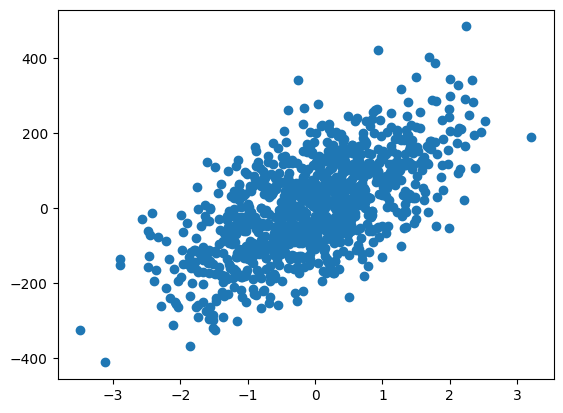

In [112]:
from matplotlib import pyplot as plt
plt.scatter(X_2, y_2)
plt.show()

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2,
                                                    shuffle = True)
hypothesis_noise100 = LinearRegression()
model_linear_noise100 = hypothesis_noise100.fit(X_train, y_train)

In [114]:
print('weight : \n{}\n\n'.format(model_linear_noise100.coef_))
print('bias : \n{}'.format(model_linear_noise100.intercept_))

weight : 
[83.93659089]


bias : 
7.7357283099564755


In [115]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_test, y_test)))

학습 데이터 점수 : 0.41
검증 데이터 점수 : 0.29


make_regression을 이용해 가상 데이터를 생성할 때 noise의 값에 따른 결과를 보여주고 있다.

### 보스턴 주택데이터 예측하기

In [116]:
from sklearn.datasets import load_boston

ImportError: ignored

In [117]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [118]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
boston = load_boston()
boston

In [ ]:
boston['data']

In [ ]:
boston['target']

In [ ]:
boston['feature_names']

In [ ]:
boston['data'].shape, boston['target'].shape

In [119]:
data.shape, target.shape

((506, 13), (506,))

In [ ]:
train_test_split?

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.2,
                                                    shuffle=True)

In [ ]:
LinearRegression?

In [121]:
from sklearn.linear_model import LinearRegression

hypothesis = LinearRegression()

model_boston = hypothesis.fit(X_train, y_train)

print('learning finished..')
print('coef_: {}'.format(model_boston.coef_))
print()
print('bias: {}'.format(model_boston.intercept_))

learning finished..
coef_: [-1.04345338e-01  4.94057214e-02  4.89599706e-02  3.53735217e+00
 -1.73464472e+01  3.93978339e+00 -7.88517347e-03 -1.40514603e+00
  2.85580472e-01 -1.18254742e-02 -9.18403516e-01  8.35958615e-03
 -4.87882219e-01]

bias: 34.370932733430266


In [122]:
model_boston.score(X_train, y_train), model_boston.score(X_test, y_test)

(0.7479961272919806, 0.7032393113894881)

In [123]:
model_boston.predict(X_test)

array([17.08849919, 16.49459637, 22.72530761, 32.15263675, 22.73952122,
       25.84550495,  0.87558217,  7.65719384, 20.95710565, 18.81946976,
       32.61576264, 22.08846157, 23.60367007, 30.32269692, 17.56537986,
       22.14774309, 23.22274258, 20.05396752, 34.1632782 , 22.69110114,
       28.03877393, 18.03567498, 26.26992887, 12.11348211, 20.71659731,
       32.33626646, 17.55671765, 13.58314561, 16.06826926, 15.12845622,
       20.5255742 , 24.21800277, 24.7218032 , 22.57603278, 29.08947915,
       21.25431252, 12.300404  , 14.98850134, 16.54530214, 21.87016192,
       24.9232016 , 35.51471724, 21.8645078 , 36.56480551, 19.36415389,
       30.71427025, 20.30633648, 23.5061087 , 13.0725402 , 31.97129   ,
       22.69535283, 25.88749641, 31.4888108 , 34.71566729, 13.8707338 ,
       22.35520741, 28.43717815, 17.77532934, 27.01853829, 27.06856423,
       11.87277352, 17.73623763, 18.88030703, 14.08090848,  5.99396563,
       17.55211552, 30.57942152, 12.6022926 , 18.15316309, 25.16